# Data Visualization Using Matplotlib

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#### 1. Create the following density plot to describe how the distribution of city mileage varies with respect the number of cylinders.

In [2]:
data = pd.read_csv("mpg.CSV")
data.head()

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class
0,audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact
1,audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact
2,audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact
3,audi,a4,2.0,2008,4,auto(av),f,21,30,p,compact
4,audi,a4,2.8,1999,6,auto(l5),f,16,26,p,compact


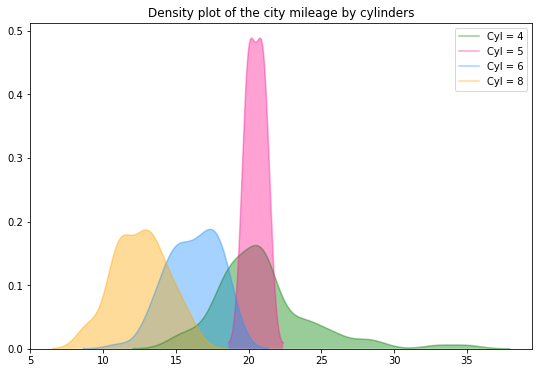

In [3]:
plt.figure(figsize = (9,6))

# kdeplot = kernel density plot
sns.kdeplot(data.loc[data.cyl == 4, 'cty'], shade = True, color = "green", alpha = 0.4, label = "Cyl = 4")  
sns.kdeplot(data.loc[data.cyl == 5, 'cty'], shade = True, color = "deeppink", alpha = 0.4, label = "Cyl = 5")
sns.kdeplot(data.loc[data.cyl == 6, 'cty'], shade = True, color = "dodgerblue", alpha = 0.4, label = "Cyl = 6")
sns.kdeplot(data.loc[data.cyl == 8, 'cty'], shade = True, color = "orange", alpha = 0.4, label = "Cyl = 8")

plt.title("Density plot of the city mileage by cylinders")
plt.show()

#### 2. Create a 2x3 grid of plots

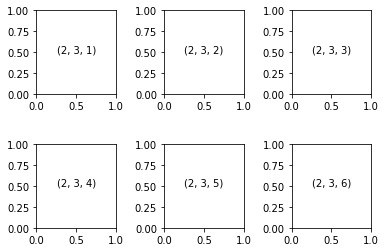

In [4]:
plt.figure()

# hspace = height 
# wspace = width
plt.subplots_adjust(hspace = 0.6, wspace = 0.6)

for i in range (1,7):
    plt.subplot(2,3,i)
    plt.text(0.5,0.5,str((2,3,i)), ha = 'center') #ha = horizontal adjustment

plt.show()

#### 3. Create a 2x3 grid of plots as follows:

In [5]:
x, y = 2,3

In [6]:
x

2

In [7]:
y

3

<Figure size 432x288 with 0 Axes>

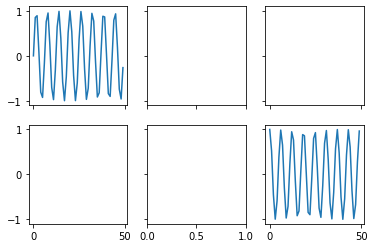

In [8]:
plt.figure()

fig,ax = plt.subplots (2,3, sharex = 'col', sharey = 'row') 
# ax is used to access individual subplots

x = np.linspace (0,50)
ax[0,0].plot(np.sin(x))
ax[1,2].plot(np.cos(x))

ax[0,0].set_xticks(np.arange(0,51,50))
ax[1,2].set_xticks(np.arange(0,51,50))

plt.show()

#### 4. Create the following plot:

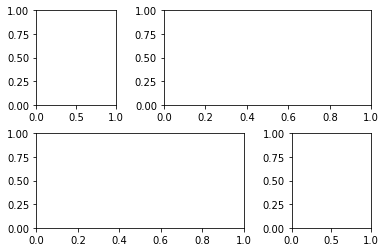

In [9]:
fig = plt.figure()
grid = plt.GridSpec(2,3)

fig.add_subplot(grid[0,0])
fig.add_subplot(grid[0,1:3])
fig.add_subplot(grid[1,0:2])
fig.add_subplot(grid[1,2])

plt.subplots_adjust(hspace = 0.3, wspace = 0.6)

plt.show()

#### 5. Use the mpg.csv dataset to create the following plot that shows the relationship between the variables displ and hwy. In addition, it shows the distribution of both using boxplots.

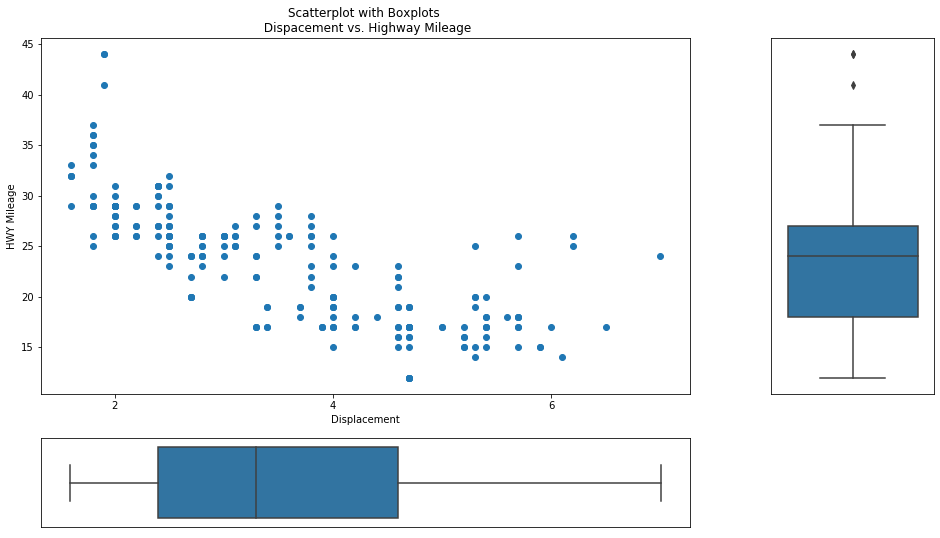

In [10]:
fig = plt.figure(figsize= (16,9))
grid = plt.GridSpec(4,4,hspace = 0.5, wspace = 0.5)

main_plot = fig.add_subplot(grid[0:3,0:3])
right_plot = fig.add_subplot(grid[0:3,3], xticklabels=[], yticklabels=[])
bottom_plot = fig.add_subplot(grid[3,0:3], xticklabels=[], yticklabels=[])


main_plot.scatter(data.displ, data.hwy)
main_plot.set_xticks(np.arange(2,8,2))

sns.boxplot(data.hwy, ax = right_plot, orient = 'v')
right_plot.set(ylabel="",xticks = [], yticks = [])


sns.boxplot(data.displ, ax = bottom_plot, orient = 'h')
bottom_plot.set(xlabel="",xticks = [], yticks = [])

main_plot.set(title = "Scatterplot with Boxplots \n Dispacement vs. Highway Mileage",
             xlabel = "Displacement", ylabel = "HWY Mileage")

plt.show()

#### 6. Use the economics.csv dataset to create the following plot which shows the relationship between personal savings rate and # of unemployed from 1967 to 2012

In [11]:
econ = pd.read_csv("economics.csv")
econ.head()

,date,pce,pop,psavert,uempmed,unemploy
0,1967-07-01,507.4,198712,12.5,4.5,2944
1,1967-08-01,510.5,198911,12.5,4.7,2945
2,1967-09-01,516.3,199113,11.7,4.6,2958
3,1967-10-01,512.9,199311,12.5,4.9,3143
4,1967-11-01,518.1,199498,12.5,4.7,3066


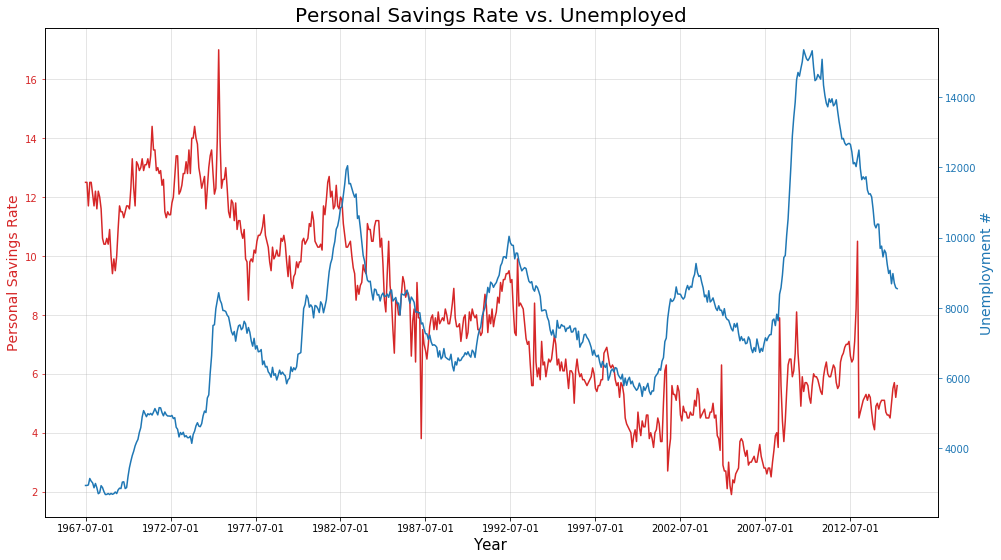

In [12]:
plt.figure(figsize = (16,9))

plt.title("Personal Savings Rate vs. Unemployed", size = 20)

## PLOT 1
plt.plot(econ.date, econ.psavert, color = "tab:red")
## create x-axis labels
ax = plt.gca()


## set the main y-axis (LEFT)
ax.set_ylabel ("Personal Savings Rate", color = "tab:red", fontsize = 14)
ax.tick_params (axis = "y", labelcolor = "tab:red", color = "tab:red")



## PLOT 2
## set the secondary y-axis (RIGHT)
ax_right = ax.twinx() # sharing the same x-axis
ax_right.plot(econ.date, econ.unemploy, color = "tab:blue")
ax_right.tick_params (axis = "y", labelcolor = "tab:blue", color = "tab:blue")
ax_right.set_ylabel ("Unemployment #", color = "tab:blue", fontsize = 14)



ax.set_xticks(np.arange(0,len(econ.date),60)) # 12 months * 5 years = 60
ax.set_xlabel ("Year", fontsize = 15)
ax.grid(alpha = 0.4)

plt.show()